# COVID-19 논문 분석

이 도전 과제에서는 COVID 팬데믹 주제를 계속 다루며, 이와 관련된 과학 논문을 처리하는 데 초점을 맞춥니다. [CORD-19 데이터셋](https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge)은 메타데이터와 초록이 포함된 COVID 관련 논문 7000편 이상(작성 시점 기준)을 제공하며, 이 중 약 절반은 전문도 제공됩니다.

[Text Analytics for Health](https://docs.microsoft.com/azure/cognitive-services/text-analytics/how-tos/text-analytics-for-health/?WT.mc_id=academic-77958-bethanycheum) 인지 서비스를 사용하여 이 데이터셋을 분석하는 전체 예시는 [이 블로그 게시물](https://soshnikov.com/science/analyzing-medical-papers-with-azure-and-text-analytics-for-health/)에 설명되어 있습니다. 우리는 이 분석의 단순화된 버전을 논의할 것입니다.


In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 데이터 가져오기

먼저, 작업할 CORD 논문들의 메타데이터를 가져와야 합니다.

**NOTE**: 이 저장소에는 데이터셋 사본이 포함되어 있지 않습니다. 먼저 [`metadata.csv`](https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge?select=metadata.csv) 파일을 [Kaggle의 이 데이터셋](https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge)에서 다운로드해야 할 수도 있습니다. Kaggle에 등록이 필요할 수 있습니다. 등록 없이도 [여기에서](https://ai2-semanticscholar-cord-19.s3-us-west-2.amazonaws.com/historical_releases.html) 데이터셋을 다운로드할 수 있지만, 메타데이터 파일 외에도 모든 전문 텍스트가 포함됩니다.

우리는 데이터를 온라인 소스에서 직접 가져오려고 시도할 것입니다. 그러나 실패할 경우, 위에서 설명한 대로 데이터를 다운로드해야 합니다. 또한, 데이터를 추가로 실험할 계획이 있다면 대기 시간을 줄이기 위해 데이터를 다운로드하는 것이 합리적입니다.

> **NOTE** 데이터셋의 크기가 약 1Gb로 상당히 크며, 아래 코드 한 줄을 실행하는 데 시간이 오래 걸릴 수 있습니다! (~5분 정도)


In [146]:
df = pd.read_csv("https://datascience4beginners.blob.core.windows.net/cord/metadata.csv.zip",compression='zip')
# df = pd.read_csv("metadata.csv")
df.head()

C:\winapp\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning:

Columns (1,4,5,6,13,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.



cord_uid                                       sha source_x  \
0  ug7v899j  d1aafb70c066a2068b02786f8929fd9c900897fb      PMC   
1  02tnwd4m  6b0567729c2143a66d737eb0a2f63f2dce2e5a7d      PMC   
2  ejv2xln0  06ced00a5fc04215949aa72528f2eeaae1d58927      PMC   
3  2b73a28n  348055649b6b8cf2b9a376498df9bf41f7123605      PMC   
4  9785vg6d  5f48792a5fa08bed9f56016f4981ae2ca6031b32      PMC   

                                               title                    doi  \
0  Clinical features of culture-proven Mycoplasma...  10.1186/1471-2334-1-6   
1  Nitric oxide: a pro-inflammatory mediator in l...           10.1186/rr14   
2    Surfactant protein-D and pulmonary host defense           10.1186/rr19   
3               Role of endothelin-1 in lung disease           10.1186/rr44   
4  Gene expression in epithelial cells in respons...           10.1186/rr61   

      pmcid pubmed_id license  \
0  PMC35282  11472636   no-cc   
1  PMC59543  11667967   no-cc   
2  PMC59549  11667972   no-cc   
3  PMC59574  11686871   no-cc   
4  PMC59580  11686888   no-cc   

                                            abstract publish_time  \
0  OBJECTIVE: This retrospective chart review des...   2001-07-04   
1  Inflammatory diseases of the respiratory tract...   2000-08-15   
2  Surfactant protein-D (SP-D) participates in th...   2000-08-25   
3  Endothelin-1 (ET-1) is a 21 amino acid peptide...   2001-02-22   
4  Respiratory syncytial virus (RSV) and pneumoni...   2001-05-11   

                                             authors         journal  mag_id  \
0                Madani, Tariq A; Al-Ghamdi, Aisha A  BMC Infect Dis     NaN   
1  Vliet, Albert van der; Eiserich, Jason P; Cros...      Respir Res     NaN   
2                                    Crouch, Erika C      Respir Res     NaN   
3  Fagan, Karen A; McMurtry, Ivan F; Rodman, David M      Respir Res     NaN   
4  Domachowske, Joseph B; Bonville, Cynthia A; Ro...      Respir Res     NaN   

  who_covidence_id arxiv_id  \
0              NaN      NaN   
1              NaN      NaN   
2              NaN      NaN   
3              NaN      NaN   
4              NaN      NaN   

                                      pdf_json_files  \
0  document_parses/pdf_json/d1aafb70c066a2068b027...   
1  document_parses/pdf_json/6b0567729c2143a66d737...   
2  document_parses/pdf_json/06ced00a5fc04215949aa...   
3  document_parses/pdf_json/348055649b6b8cf2b9a37...   
4  document_parses/pdf_json/5f48792a5fa08bed9f560...   

                               pmc_json_files  \
0  document_parses/pmc_json/PMC35282.xml.json   
1  document_parses/pmc_json/PMC59543.xml.json   
2  document_parses/pmc_json/PMC59549.xml.json   
3  document_parses/pmc_json/PMC59574.xml.json   
4  document_parses/pmc_json/PMC59580.xml.json   

                                                 url  s2_id  
0  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...    NaN  
1  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...    NaN  
2  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...    NaN  
3  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...    NaN  
4  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...    NaN

우리는 이제 출판 날짜 열을 `datetime`으로 변환하고, 출판 날짜 범위를 확인하기 위해 히스토그램을 그릴 것입니다.


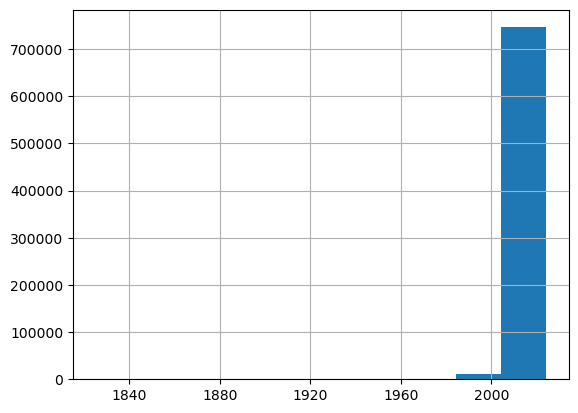

In [147]:
df['publish_time'] = pd.to_datetime(df['publish_time'])
df['publish_time'].hist()
plt.show()

## 구조화된 데이터 추출

초록에서 쉽게 추출할 수 있는 정보에는 어떤 것들이 있는지 살펴봅시다. 우리가 관심을 가질 수 있는 한 가지는 치료 전략이 어떤 것들이 존재하며, 시간이 지나면서 어떻게 발전했는지 확인하는 것입니다. 먼저, COVID 치료에 사용된 가능한 약물 목록과 진단 목록을 수동으로 작성할 수 있습니다. 그런 다음 이를 검토하고 논문 초록에서 해당 용어를 검색합니다.


In [148]:
medications = [
    'hydroxychloroquine', 'chloroquine', 'tocilizumab', 'remdesivir', 'azithromycin', 
    'lopinavir', 'ritonavir', 'dexamethasone', 'heparin', 'favipiravir', 'methylprednisolone']
diagnosis = [
    'covid','sars','pneumonia','infection','diabetes','coronavirus','death'
]

for m in medications:
    print(f" + Processing medication: {m}")
    df[m] = df['abstract'].apply(lambda x: str(x).lower().count(' '+m))
    
for m in diagnosis:
    print(f" + Processing diagnosis: {m}")
    df[m] = df['abstract'].apply(lambda x: str(x).lower().count(' '+m))

 + Processing medication: hydroxychloroquine
 + Processing medication: chloroquine
 + Processing medication: tocilizumab
 + Processing medication: remdesivir
 + Processing medication: azithromycin
 + Processing medication: lopinavir
 + Processing medication: ritonavir
 + Processing medication: dexamethasone
 + Processing medication: heparin
 + Processing medication: favipiravir
 + Processing medication: methylprednisolone
 + Processing diagnosis: covid
 + Processing diagnosis: sars
 + Processing diagnosis: pneumonia
 + Processing diagnosis: infection
 + Processing diagnosis: diabetes
 + Processing diagnosis: coronavirus
 + Processing diagnosis: death


우리는 데이터프레임에 특정 약물/진단명이 초록에서 등장한 횟수를 포함하는 여러 열을 추가했습니다.

> **참고**: 부분 문자열을 찾을 때 단어의 시작에 공백을 추가합니다. 그렇지 않으면 잘못된 결과를 얻을 수 있습니다. 예를 들어, *chloroquine*은 *hydroxychloroquine*이라는 부분 문자열 안에서도 발견될 수 있기 때문입니다. 또한, 오류를 방지하기 위해 초록 열을 `str`로 강제 변환합니다. `str`을 제거하고 어떤 일이 발생하는지 확인해 보세요.

데이터 작업을 더 쉽게 하기 위해 약물 등장 횟수만 포함된 하위 프레임을 추출하고, 누적 발생 횟수를 계산할 수 있습니다. 이를 통해 가장 인기 있는 약물을 알 수 있습니다:


In [149]:
dfm = df[medications]
dfm = dfm.sum().reset_index().rename(columns={ 'index' : 'Name', 0 : 'Count'})
dfm.sort_values('Count',ascending=False)

Name  Count
0   hydroxychloroquine   9806
3           remdesivir   7861
2          tocilizumab   6118
1          chloroquine   4578
8              heparin   4161
5            lopinavir   3811
4         azithromycin   3585
7        dexamethasone   3340
9          favipiravir   2439
10  methylprednisolone   1600
6            ritonavir    948

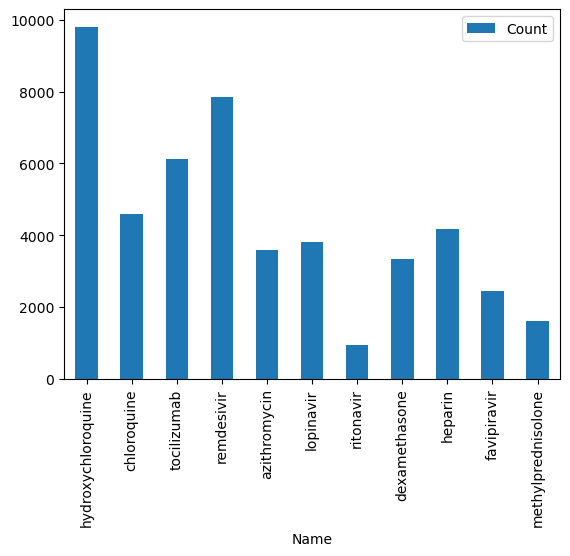

In [150]:
dfm.set_index('Name').plot(kind='bar')
plt.show()

## 치료 전략에서의 트렌드 찾기

위 예시에서는 모든 값을 `sum`으로 합산했지만, 월별로도 동일한 작업을 수행할 수 있습니다:


In [151]:
dfm = df[['publish_time']+medications].set_index('publish_time')
dfm = dfm[(dfm.index>="2020-01-01") & (dfm.index<="2021-07-31")]
dfmt = dfm.groupby([dfm.index.year,dfm.index.month]).sum()
dfmt

hydroxychloroquine  chloroquine  tocilizumab  \
publish_time publish_time                                                 
2020         1                           3672         1773         1779   
             2                              0           19            0   
             3                             45           72            5   
             4                            188          238           50   
             5                            459          191          158   
             6                            381          149          243   
             7                            381          178          202   
             8                            307          115          172   
             9                            319          123          185   
             10                           319           96          212   
             11                           272           66          170   
             12                           255          102          229   
2021         1                           2191          780         1787   
             2                            163           66          184   
             3                            172           85          190   
             4                            198           70          125   
             5                            141           55          138   
             6                            144           29          138   
             7                            112           49           96   

                           remdesivir  azithromycin  lopinavir  ritonavir  \
publish_time publish_time                                                   
2020         1                   2134          1173       1430        370   
             2                      3             3         18         11   
             3                     27            12         52         16   
             4                    124            68        113         13   
             5                    209           132        135         41   
             6                    186           110        132         18   
             7                    165           108        138         29   
             8                    165           145         91         24   
             9                    190            91         98         28   
             10                   227            72        127         39   
             11                   197            79        104         27   
             12                   271            98         76         31   
2021         1                   2523           892        841        198   
             2                    173            85         76          9   
             3                    295            87        100         17   
             4                    161            83         60         13   
             5                    179            69         55         21   
             6                    182            75         41         12   
             7                    270            64         59          5   

                           dexamethasone  heparin  favipiravir  \
publish_time publish_time                                        
2020         1                       561      984          666   
             2                         1        3           12   
             3                         3       21           11   
             4                        14       77           48   
             5                        12       92           48   
             6                        48       84           30   
             7                        58      117           56   
             8                        56       95           45   
             9                        90      111           46   
             10                       97      117           81   
             11                       77 

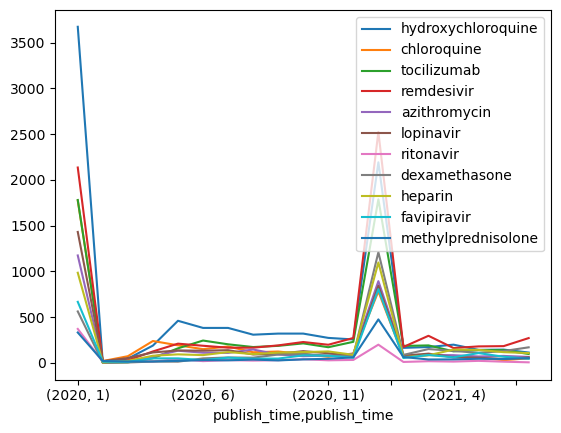

In [152]:
dfmt.plot()
plt.show()

흥미로운 점은 두 지점에서 큰 급증이 있다는 것입니다: 2020년 1월과 2021년 1월. 이는 일부 논문이 명확한 출판 날짜를 명시하지 않았고, 해당 연도의 1월로 지정되었기 때문입니다.

데이터를 더 잘 이해하기 위해 몇 가지 약물만 시각화해 보겠습니다. 또한 1월 데이터를 "지우고", 중간값으로 채워서 더 보기 좋은 그래프를 만들어 보겠습니다:


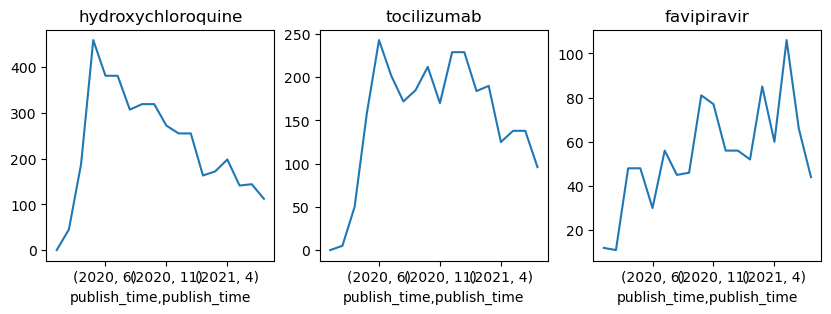

In [153]:
meds = ['hydroxychloroquine','tocilizumab','favipiravir']
dfmt.loc[(2020,1)] = np.nan
dfmt.loc[(2021,1)] = np.nan
dfmt.fillna(method='pad',inplace=True)
fig, ax = plt.subplots(1,len(meds),figsize=(10,3))
for i,m in enumerate(meds):
    dfmt[m].plot(ax=ax[i])
    ax[i].set_title(m)
plt.show()

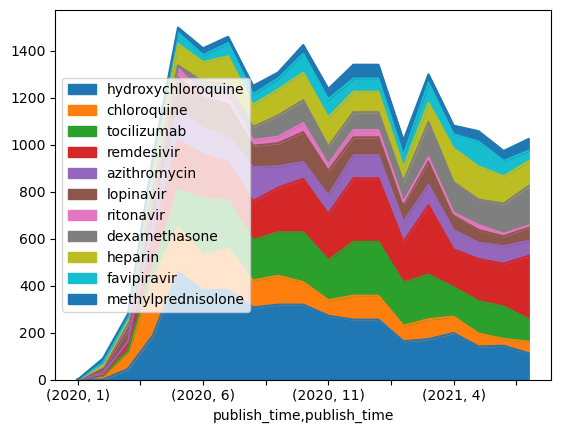

In [154]:
dfmt.plot.area()
plt.show()

더 나아가, 우리는 상대적인 인기를 백분율로 계산할 수 있습니다:


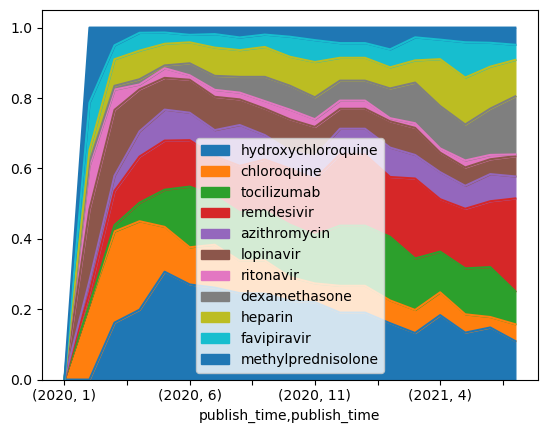

In [155]:
dfmtp = dfmt.iloc[:,:].apply(lambda x: x/x.sum(), axis=1)
dfmtp.plot.area()
plt.show()

## 의학 진단과 약물의 상관관계 계산

가장 흥미로운 관계 중 하나는 서로 다른 진단이 어떻게 다른 약물로 치료되는지를 살펴보는 것입니다. 이를 시각화하려면, 두 용어가 동일한 논문에서 몇 번 언급되었는지를 보여주는 **공동 발생 빈도 지도**를 계산해야 합니다.

이 지도는 본질적으로 2D 행렬이며, **numpy 배열**로 가장 잘 표현됩니다. 이 지도를 계산하기 위해 모든 초록을 살펴보며, 그곳에 등장하는 엔터티를 표시할 것입니다:


In [156]:
m = np.zeros((len(medications),len(diagnosis)))
for a in df['abstract']:
    x = str(a).lower()
    for i,d in enumerate(diagnosis):
        if ' '+d in x:
            for j,me in enumerate(medications):
                if ' '+me in x:
                    m[j,i] += 1

In [157]:
m

array([[4788., 2264.,  741., 2109.,  348., 2730.,  975.],
       [2111., 1238.,  231.,  998.,   79., 1394.,  364.],
       [2186.,  821.,  691., 1063.,  185., 1136.,  573.],
       [3210., 2191.,  522., 1538.,  160., 2191.,  622.],
       [1803.,  773.,  406.,  880.,  133.,  909.,  410.],
       [1982., 1102.,  379.,  885.,  113., 1366.,  370.],
       [ 504.,  356.,   83.,  259.,   23.,  354.,  106.],
       [1419.,  640.,  345.,  742.,  108.,  760.,  314.],
       [1537.,  678.,  330.,  782.,   93.,  826.,  301.],
       [ 967.,  634.,  201.,  431.,   44.,  656.,  136.],
       [ 660.,  336.,  293.,  385.,   53.,  452.,  148.]])

이 행렬을 시각화하는 방법 중 하나는 **히트맵**을 그리는 것입니다:


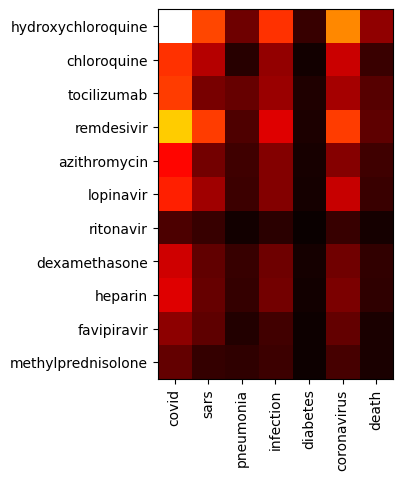

In [158]:
plt.imshow(m,interpolation='nearest',cmap='hot')
ax = plt.gca()
ax.set_yticks(range(len(medications))) 
ax.set_yticklabels(medications)
ax.set_xticks(range(len(diagnosis)))
ax.set_xticklabels(diagnosis,rotation=90)
plt.show()

그러나 **Sankey** 다이어그램을 사용하면 더욱 뛰어난 시각화를 할 수 있습니다! `matplotlib`은 이 다이어그램 유형에 대한 기본 지원을 제공하지 않으므로, [이 튜토리얼](https://plotly.com/python/sankey-diagram/)에서 설명된 대로 [Plotly](https://plotly.com/python/)를 사용해야 합니다.

Plotly Sankey 다이어그램을 만들기 위해서는 다음과 같은 리스트를 구성해야 합니다:
* 그래프의 모든 노드를 포함하는 `all_nodes` 리스트. 여기에는 약물과 진단이 모두 포함됩니다.
* 소스와 타겟 인덱스 리스트 - 이 리스트는 어떤 노드가 다이어그램의 왼쪽으로 이동하고, 어떤 노드가 오른쪽으로 이동하는지를 보여줍니다.
* 모든 링크의 리스트. 각 링크는 다음을 포함합니다:
   - `all_nodes` 배열에서의 소스 인덱스
   - 타겟 인덱스
   - 링크의 강도를 나타내는 값. 이는 바로 우리의 공출현 행렬에서 가져온 값입니다.
   - 선택적으로 링크의 색상. 명확성을 위해 일부 용어를 강조 표시할 수 있는 옵션을 추가할 것입니다.

Sankey 다이어그램을 그리는 일반적인 코드는 별도의 `sankey` 함수로 구조화되어 있으며, 이 함수는 두 개의 리스트(소스와 타겟 카테고리)와 공출현 행렬을 입력으로 받습니다. 또한 임계값을 지정할 수 있어, 해당 임계값보다 약한 모든 링크를 생략할 수 있습니다. 이렇게 하면 다이어그램이 조금 덜 복잡해집니다.


In [160]:
import plotly.graph_objects as go

def sankey(cat1, cat2, m, treshold=0, h1=[], h2=[]):
    all_nodes = cat1 + cat2
    source_indices = list(range(len(cat1)))
    target_indices = list(range(len(cat1),len(cat1)+len(cat2)))

    s, t, v, c = [], [], [], []
    for i in range(len(cat1)):
        for j in range(len(cat2)):
            if m[i,j]>treshold:
                s.append(i)
                t.append(len(cat1)+j)
                v.append(m[i,j])
                c.append('pink' if i in h1 or j in h2 else 'lightgray')

    fig = go.Figure(data=[go.Sankey(
        # Define nodes
        node = dict(
        pad = 40,
        thickness = 40,
        line = dict(color = "black", width = 1.0),
        label =  all_nodes),

        # Add links
        link = dict(
        source =  s,
        target =  t,
        value =  v,
        color = c
    ))])
    fig.show()

sankey(medications,diagnosis,m,500,h2=[0])

## 결론

우리는 텍스트와 같은 비구조화된 데이터 소스에서 정보를 추출하기 위해 비교적 간단한 방법을 사용할 수 있다는 것을 확인했습니다. 이 예제에서는 기존의 약물 목록을 사용했지만, 텍스트에서 엔티티를 추출하기 위해 자연어 처리(NLP) 기술을 사용하는 것이 훨씬 더 강력할 것입니다. [이 블로그 글](https://soshnikov.com/science/analyzing-medical-papers-with-azure-and-text-analytics-for-health/)에서는 클라우드 서비스를 사용하여 엔티티를 추출하는 방법을 설명합니다. 또 다른 옵션으로는 [NLTK](https://www.nltk.org/)와 같은 Python NLP 라이브러리를 사용하는 것입니다. NLTK를 사용하여 텍스트에서 정보를 추출하는 접근 방식은 [여기](https://www.nltk.org/book/ch07.html)에 설명되어 있습니다.


## 도전 과제

다음과 같은 방향으로 COVID 논문 데이터를 계속 연구하세요:

1. 다양한 약물의 동시 발생 행렬을 구축하고, 어떤 약물들이 자주 함께 나타나는지 확인하세요 (즉, 하나의 초록에서 언급된 경우). 약물 및 진단에 대한 동시 발생 행렬을 구축하는 코드를 수정할 수 있습니다.
1. 이 행렬을 히트맵으로 시각화하세요.
1. 추가 목표로, [chord diagram](https://en.wikipedia.org/wiki/Chord_diagram)을 사용하여 약물의 동시 발생을 시각화해 보세요. [이 라이브러리](https://pypi.org/project/chord/)가 chord diagram을 그리는 데 도움이 될 수 있습니다.
1. 또 다른 추가 목표로, 정규 표현식을 사용하여 다양한 약물의 복용량(예: *chloroquine을 하루에 400mg 복용*에서 **400mg**)을 추출하고, 약물별로 다른 복용량을 보여주는 데이터프레임을 구축해 보세요. **참고**: 약물 이름과 텍스트적으로 가까운 위치에 있는 숫자 값을 고려하세요.



---

**면책 조항**:  
이 문서는 AI 번역 서비스 [Co-op Translator](https://github.com/Azure/co-op-translator)를 사용하여 번역되었습니다. 정확성을 위해 최선을 다하고 있으나, 자동 번역에는 오류나 부정확성이 포함될 수 있습니다. 원본 문서의 원어 버전을 권위 있는 자료로 간주해야 합니다. 중요한 정보의 경우, 전문적인 인간 번역을 권장합니다. 이 번역 사용으로 인해 발생하는 오해나 잘못된 해석에 대해 책임을 지지 않습니다.
